# Bài tập 2

# Mục lục
1. [Giới thiệu](#gioithieu)

2. [Phân tích dữ liệu](#dataset)

    2.1 [Thêm thư viện](#library)
    
    2.2 [Thêm đường dẫn dữ liệu](#data)
    
    2.3 [Mô tả dữ liệu](#description)
    
    2.4 [Mô tả dữ liệu số](#numerical)

3. [Các yếu tố có thể ảnh hưởng đến thu nhập](#question1)

    3.1 [Age](#age1)
    
    3.2 [Capital-gain](#capitalgain)
    
    3.3 [Capital-loss](#capitalloss)
    
    3.4 [Educational-num](#educationalnum)
    
    3.5 [Hour-per-week](#hourperweek)

4. [Dự đoán về đặc điểm của một người có thu nhập cao](#question2)

## 1. Giới thiệu <a name="introduction"></a>
- Đây là dữ liệu thu nhập hằng năm kèm theo các yếu tố như trình độ học vấn, độ tuổi, giới tính, nghề nghiệp,...Tập dữ liệu này được lấy từ tập databases machine learning của kho lưu trữ UCI http://www.cs.toronto.edu/~delve/data/adult/desc.html. 

- Phần trình bày bao gồm 3 phần. Đầu tiên là mô tả dữ liệu, sau đó là kiểm tra một vài yếu tố có thể ảnh hưởng đến thu nhập, cuối cùng là dự đoán một người có thu nhập cao thì có thể sẽ có những đặc điểm nào.

- Để thuận tiện cho việc mô tả dữ liệu, phần trình bày sẽ sử dụng ngôn ngữ lập trình python chạy trên jupyter notebook.

## 2. Phân tích dữ liệu<a name="dataset"></a>

#### Thêm thư viện<a name="library"></a>

In [2]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import ttest_ind

#### Thêm đường dẫn đến tập dữ liệu<a name="data"></a>

In [3]:
url = "D:\Hoang\SauDaiHoc\PhuongPhapNCKH\Bai 2\income1.csv"
data = pd.read_csv(url)

#### Mô tả dữ liệu<a name="description"></a>

In [4]:
# Kích thước của tập dữ liệu
print("Kích thước dữ liệu là: {}".format(data.shape))

Kích thước dữ liệu là: (48842, 15)


In [5]:
# Tên các cột của tập dữ liệu
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educationalnum',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capitalgain', 'capitalloss', 'hoursperweek', 'native-country',
       'income'],
      dtype='object')

In [6]:
# 5 dòng đầu của tập dữ liệu
data.head()

,age,workclass,fnlwgt,education,educationalnum,marital-status,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [13]:
# Kiểu dữ liệu của các cột
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
educationalnum    48842 non-null int64
marital-status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
gender            48842 non-null object
capitalgain       48842 non-null int64
capitalloss       48842 non-null int64
hoursperweek      48842 non-null int64
native-country    48842 non-null object
income            48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Dữ liệu hiện tại không có gì bất thường

In [9]:
# Kiểm tra giá trị trống
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
educationalnum    0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capitalgain       0
capitalloss       0
hoursperweek      0
native-country    0
income            0
dtype: int64

Không có giá trị trống

In [7]:
# Mô tả tập dữ liệu
perc = [.25, .5, .75] # percentile list
data.describe(percentiles = perc, include = None, exclude = None)

,age,fnlwgt,educationalnum,capitalgain,capitalloss,hoursperweek
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


- count là số lượng
- mean là giá trị trung bình
- std là độ lệch chuẩn
- min, max là giá trị nhỏ nhất và lớn nhất
- 25%,50%,75% là giá trị ở vị trí 25%,50%,75% trong tổng thể

#### Trực quan hóa dữ liệu số (dữ liệu dạng category không phân tích trong bài tập này)<a name="numerical"></a>

In [14]:
# Xác định tên dữ liệu số
data.select_dtypes(['float64','int64']).columns

Index(['age', 'fnlwgt', 'educationalnum', 'capitalgain', 'capitalloss',
       'hoursperweek'],
      dtype='object')

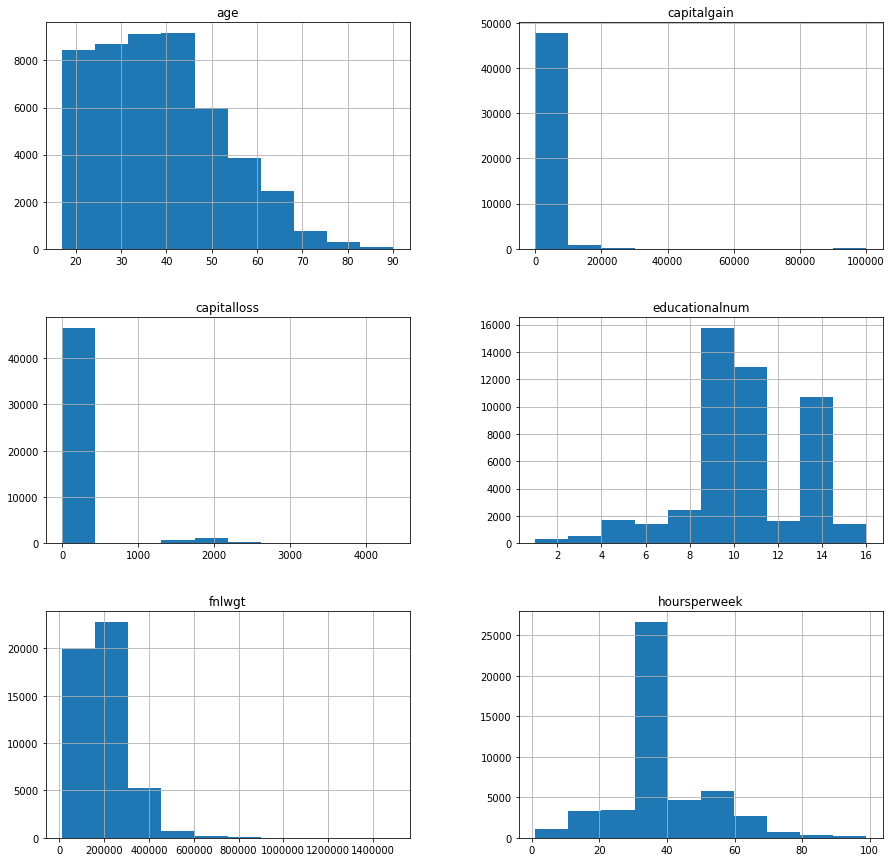

In [12]:
# Vẽ đồ thị phân bố dữ liệu số
data.hist(figsize=(15,15))
plt.show()

#### Nhận xét
- Độ tuổi khảo sát phân bố đều từ khoảng 18 đến 45 tuổi, sau 45 tuổi bắt đầu giảm dần
- Capital-gain và Capital-loss tập trung chủ yếu là 0
- Ở Education-num, phân bố tập trung chủ yếu trong khoảng [9,11] và 14
- Ở fnlwgt, phân bố tập trung chủ yếu từ 0 dến 300000, ở mức 400000 chiếm một số lượng nhỏ và từ 420000 chiếm số lượng rất ít
- Ở hours-per-week, tập trung chủ yếu là 40

## 3. Các yếu tố có thể ảnh hưởng đến thu nhập<a name="question1"></a>

Phần này sẽ chọn 5 yếu tố gồm age, capital-gain, capital-loss, educational-num, hours-per-week là các biến số và sử dụng independent t-test để kiểm tra xem những yếu tố nào ảnh hưởng đến thu nhập.

### 1.1 Age<a name="age1"></a>

In [9]:
data['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [10]:
print("Phần trăm người có thu nhập lớn hơn 50k là {:.1f}% và phần trăm người có thu nhập nhỏ hơn {:.1f}%".format(
    data[data['income'] == '>50K'].shape[0] / data.shape[0]*100,
    data[data['income'] == '<=50K'].shape[0] / data.shape[0]*100))

Phần trăm người có thu nhập lớn hơn 50k là 23.9% và phần trăm người có thu nhập nhỏ hơn 76.1%


111.48258997232631

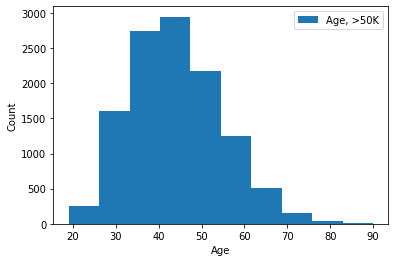

In [11]:
plt.hist(data.age[data.income == '>50K'], label=['Age, >50K'])
plt.legend(loc='upper right')
plt.xlabel("Age")
plt.ylabel("Count")
np.var(data.age[data.income == '>50K'])

198.92079134062269

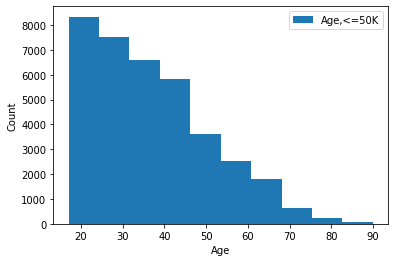

In [12]:
plt.hist(data.age[data.income == '<=50K'], label=['Age,<=50K'])
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(loc='upper right')
np.var(data.age[data.income == '<=50K'])

#### Kiểm tra phương sai bằng nhau

Giả thuyết null: Các phương sai là bằng nhau

In [13]:
scipy.stats.levene(data.age[data.income == '>50K'],data.age[data.income == '<=50K'])

LeveneResult(statistic=1067.380257766712, pvalue=1.2876599116732577e-231)

pvalue<0.05. Các phương sai là không bằng nhau

#### t-test
Giả thuyết null H0: Không có sự khác biệt đáng kể giữa tuổi trong 2 nhóm thu nhập

In [14]:
ttest_ind(data.age[data.income == '>50K'],data.age[data.income == '<=50K'],equal_var=False,nan_policy='omit')

Ttest_indResult(statistic=60.66031699711951, pvalue=0.0)

pvalue<0.05. Phủ định H0. Có sự khác biệt giữa tuổi trong 2 nhóm thu nhập

### 1.2 Capital-gain <a name="capitalgain"></a>

217743658.48297718

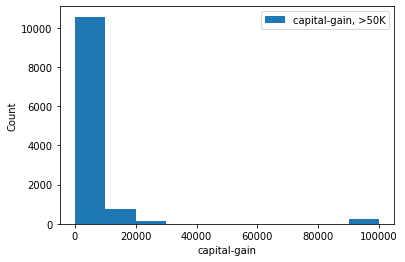

In [15]:
plt.hist(data.capitalgain[data.income == '>50K'], label =['capital-gain, >50K'])
plt.xlabel("capital-gain")
plt.ylabel("Count")
plt.legend(loc='upper right')
np.var(data.capitalgain[data.income == '>50K'])

877483.8359053261

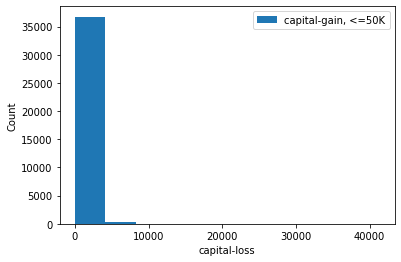

In [16]:
plt.hist(data.capitalgain[data.income == '<=50K'], label=['capital-gain, <=50K'])
plt.xlabel("capital-loss")
plt.ylabel("Count")
plt.legend(loc='upper right')
np.var(data.capitalgain[data.income == '<=50K'])

#### Kiểm tra phương sai bằng nhau

Giả thuyết null: Các phương sai là bằng nhau

In [17]:
scipy.stats.levene(data.capitalgain[data.income == '>50K'],data.capitalgain[data.income == '<=50K'])

LeveneResult(statistic=2556.1790709041784, pvalue=0.0)

pvalue<0.05. Các phương sai là không bằng nhau

#### t-test
Giả thuyết null H0: Không có sự khác biệt đáng kể trong capital-gain giữa hai nhóm thu nhập cao và thấp 

In [18]:
ttest_ind(data.capitalgain[data.income == '>50K'],data.capitalgain[data.income == '<=50K'],equal_var=False,nan_policy='omit')

Ttest_indResult(statistic=28.517938985920075, pvalue=5.257854342800737e-173)

pvalue<0.05. Phủ định H0. Có sự khác biệt trong capital-gain giữa hai nhóm thu nhập cao và thấp

### 1.3 Capital-loss<a name="capitalloss"></a>

351869.9060447618

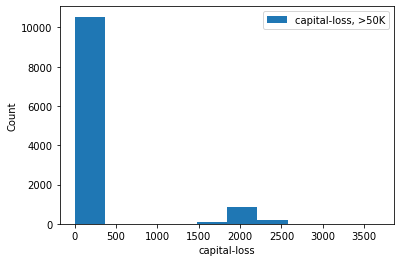

In [19]:
plt.hist(data.capitalloss[data.income == '>50K'], label=['capital-loss, >50K'])
plt.xlabel("capital-loss")
plt.ylabel("Count")
plt.legend(loc='upper right')
np.var(data.capitalloss[data.income == '>50K'])


98166.7832417144

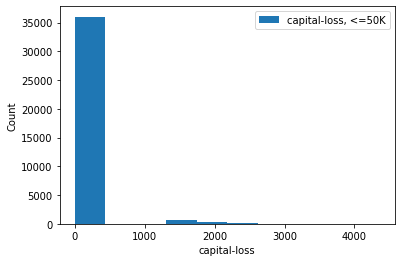

In [20]:
plt.hist(data.capitalloss[data.income == '<=50K'], label=['capital-loss, <=50K'])
plt.xlabel("capital-loss")
plt.ylabel("Count")
plt.legend(loc='upper right')
np.var(data.capitalloss[data.income == '<=50K'])

#### Kiểm tra phương sai bằng nhau

Giả thuyết null: Các phương sai là bằng nhau

In [21]:
scipy.stats.levene(data.capitalloss[data.income == '>50K'],data.capitalloss[data.income == '<=50K'])

LeveneResult(statistic=1087.0275697773493, pvalue=8.543599059076473e-236)

pvalue<0.05. Các phương sai là không bằng nhau

#### t-test
Giả thuyết H0: Không có sự khác biệt đáng kể trong capital-loss giữa hai nhóm thu nhập cao và thấp

In [22]:
ttest_ind(data.capitalloss[data.income == '>50K'],data.capitalloss[data.income == '<=50K'],equal_var=False,nan_policy='omit')

Ttest_indResult(statistic=24.353911506795583, pvalue=2.6487594061649215e-128)

pvalue<0.05. Phủ định H0. Có sự khác biệt trong capital-loss giữa hai nhóm thu nhập cao và thấp

### 1.4 Educational-num <a name="educationalnum"></a>

5.67641207714321

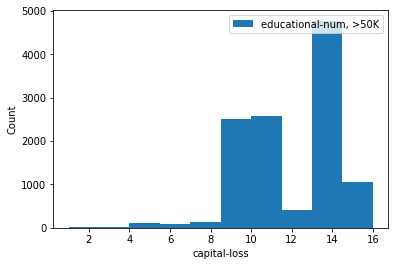

In [23]:
plt.hist(data.educationalnum[data.income == '>50K'], label=['educational-num, >50K'])
plt.xlabel("capital-loss")
plt.ylabel("Count")
plt.legend(loc='upper right')
np.var(data.educationalnum[data.income == '>50K'])


5.94208896774989

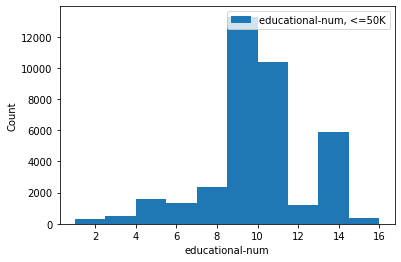

In [24]:
plt.hist(data.educationalnum[data.income == '<=50K'], label=['educational-num, <=50K'])
plt.xlabel("educational-num")
plt.ylabel("Count")
plt.legend(loc='upper right')
np.var(data.educationalnum[data.income == '<=50K'])

### Kiểm tra phương sai bằng nhau

In [25]:
scipy.stats.levene(data.educationalnum[data.income == '>50K'],data.educationalnum[data.income == '<=50K'])

LeveneResult(statistic=419.24281968037536, pvalue=8.76235492738118e-93)

pvalue<0.05. Các phương sai là không bằng nhau

### t-test

In [26]:
ttest_ind(data.educationalnum[data.income == '>50K'],data.educationalnum[data.income == '<=50K'],equal_var=False,nan_policy='omit')

Ttest_indResult(statistic=78.87845255016076, pvalue=0.0)

pvalue<0.05. Có sự khác biệt trong educaltion-num giữa hai nhóm thu nhập cao và thấp

### 1.5 Hours-per-week <a name="hourperweek"></a>

123.00366385362885

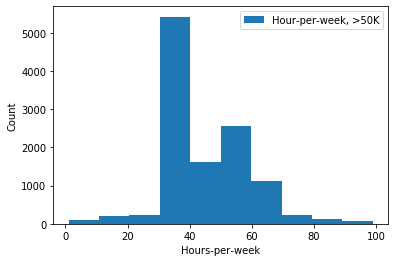

In [27]:
plt.hist(data.hoursperweek[data.income == '>50K'], label=['Hour-per-week, >50K'])
plt.xlabel("Hours-per-week")
plt.ylabel("Count")
plt.legend(loc='upper right')
np.var(data.hoursperweek[data.income == '>50K'])


152.68761695363062

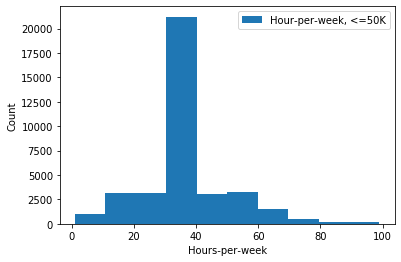

In [28]:
plt.hist(data.hoursperweek[data.income == '<=50K'], label=['Hour-per-week, <=50K'])
plt.xlabel("Hours-per-week")
plt.ylabel("Count")
plt.legend(loc='upper right')
np.var(data.hoursperweek[data.income == '<=50K'])

### Kiểm tra phương sai bằng nhau

In [29]:
scipy.stats.levene(data.hoursperweek[data.income == '>50K'],data.hoursperweek[data.income == '<=50K'])

LeveneResult(statistic=11.604561926599041, pvalue=0.000658432263007638)

pvalue<0.05. Phương sai không bằng nhau

### t-test

In [30]:
ttest_ind(data.hoursperweek[data.income == '>50K'],data.hoursperweek[data.income == '<=50K'],equal_var=False,nan_policy='omit')

Ttest_indResult(statistic=54.662247230930255, pvalue=0.0)

pvalue<0.05. Có sự khác biệt trong hours-per-week giữa hai nhóm thu nhập cao và thấp

### Trả lời:
- Cả 5 yếu tố Age, Capital-gain, Capital-loss, Educational-num và Hours-per-week ảnh hưởng đến tỉ lệ thu nhập cao và thấp

## 4. Dự đoán về đặc điểm của một người có thu nhập cao<a name="question2"></a>

Phần này sẽ tìm giá trị xuất hiện nhiều nhất của Age, Capital-gain, Capital-loss, Educational-num và Hours-per-week trong 3 nhóm gồm tổng thể, thu nhập trên 50k và thu nhập dưới 50k. Sau đó sẽ so sánh các giá trị này để dự đoán đặc điểm của một người có thu nhập cao

In [31]:
#Phân chia dữ liệu thành 2 nhóm thu nhập cao và thu nhập thấp
thunhapcao = data.loc[data['income'] == ">50K"]
thunhapthap = data.loc[data['income'] == "<=50K"]

In [32]:
#Số lần xuất hiện nhiều nhất trong tổng thể
print("Trong tổng thể:")
print(" - Số lần xuất hiện nhiều nhất của Age là: {}".format(np.median(data.age)))
print(" - Số lần xuất hiện nhiều nhất của Capital-gain là: {}".format(np.median(data.capitalgain)))
print(" - Số lần xuất hiện nhiều nhất của Capital-loss là: {}".format(np.median(data.capitalloss)))
print(" - Số lần xuất hiện nhiều nhất của Educational-num là: {}".format(np.median(data.educationalnum)))
print(" - Số lần xuất hiện nhiều nhất của Hours-per-week: {}".format(np.median(data.hoursperweek)))
#Số lần xuất hiện nhiều nhất trong nhóm thu nhập cao
print("Trong nhóm thu nhập cao:")
print(" - Số lần xuất hiện nhiều nhất của Age là: {}".format(np.median(thunhapcao.age)))
print(" - Số lần xuất hiện nhiều nhất của Capital-gain là: {}".format(np.median(thunhapcao.capitalgain)))
print(" - Số lần xuất hiện nhiều nhất của Capital-loss là: {}".format(np.median(thunhapcao.capitalloss)))
print(" - Số lần xuất hiện nhiều nhất của Educational-num là: {}".format(np.median(thunhapcao.educationalnum)))
print(" - Số lần xuất hiện nhiều nhất của Hours-per-week: {}".format(np.median(thunhapcao.hoursperweek)))
#Số lần xuất hiện nhiều nhất trong nhóm thu nhập thấp
print("Trong nhóm thu nhập thấp:")
print(" - Số lần xuất hiện nhiều nhất của Age là: {}".format(np.median(thunhapthap.age)))
print(" - Số lần xuất hiện nhiều nhất của Capital-gain là: {}".format(np.median(thunhapthap.capitalgain)))
print(" - Số lần xuất hiện nhiều nhất của Capital-loss là: {}".format(np.median(thunhapthap.capitalloss)))
print(" - Số lần xuất hiện nhiều nhất của Educational-num là: {}".format(np.median(thunhapthap.educationalnum)))
print(" - Số lần xuất hiện nhiều nhất của Hours-per-week: {}".format(np.median(thunhapthap.hoursperweek)))

Trong tổng thể:
 - Số lần xuất hiện nhiều nhất của Age là: 37.0
 - Số lần xuất hiện nhiều nhất của Capital-gain là: 0.0
 - Số lần xuất hiện nhiều nhất của Capital-loss là: 0.0
 - Số lần xuất hiện nhiều nhất của Educational-num là: 10.0
 - Số lần xuất hiện nhiều nhất của Hours-per-week: 40.0
Trong nhóm thu nhập cao:
 - Số lần xuất hiện nhiều nhất của Age là: 43.0
 - Số lần xuất hiện nhiều nhất của Capital-gain là: 0.0
 - Số lần xuất hiện nhiều nhất của Capital-loss là: 0.0
 - Số lần xuất hiện nhiều nhất của Educational-num là: 12.0
 - Số lần xuất hiện nhiều nhất của Hours-per-week: 40.0
Trong nhóm thu nhập thấp:
 - Số lần xuất hiện nhiều nhất của Age là: 34.0
 - Số lần xuất hiện nhiều nhất của Capital-gain là: 0.0
 - Số lần xuất hiện nhiều nhất của Capital-loss là: 0.0
 - Số lần xuất hiện nhiều nhất của Educational-num là: 9.0
 - Số lần xuất hiện nhiều nhất của Hours-per-week: 40.0


- Có sự khác biệt trong số lần xuất hiện nhiều nhất của Age và Educational-num trong hai nhóm thu nhập cao và thu nhập thấp.
- Nhưng không có sự khác biệt trong Captital-gain, Capital-loss, Hours-per-week.

### Trả lời:
- Một người có thu nhập cao thì độ tuổi là 43 và Educational-num là 12